<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/Sample_Fastai_without_tags_RVLCDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 189 kB 9.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 720 kB 7.9 MB/s 
     |████████████████████████████████| 46 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 76.2 MB/s 
     |████████████████████████████████| 51 kB 445 kB/s 


In [3]:
#hide
from fastbook import *
from IPython.display import display, HTML

In [4]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#path = '/content/drive/.shortcut-targets-by-id/1-qv-5jmPjOBKOLQl9B6mzvygl_RQ_Y7l/RVL_CDIP/labels/'
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_train = pd.read_csv(path + 'train.csv', delimiter=',', error_bad_lines=False)

In [7]:
df_train.head()

,path,label,text
0,imagese/e/w/c/ewc23d00/513280028.tif,1,"7002 00 OF (2 DOCUMENT CLEARANCE SHEET P (For Original Contracts Only) 2004-00-00 CONTRACT # CONTRACT SUBJECT: \TCHBL 1 COMPANY: |. BEI INS BRAND(s): _CAMEL TOTAL COST: _$528,000 CURRENT YEAR EFO: _($528,000: BRIEF DESCRIPTION: _D. D. BEAN WILL PRODUCE AND DISTRIBUTE UP TO 264,000 CASES _ OF PRINTED CAMEL ADVERTISING ON MATCHBOOKS, PROGRAM] G/L CODE: 04-73-4600-8215-855 LINE ITEM: 200737-072402 *IMPLEMENTOR: _S. B. DRISKE! **BRAND MANAGEMENT: __E. C. LEARY. TRVOICE APPROVAL AUTHORITY INVOICE APPROVAL AUTHORITY REVIEW ROUTING: DEPARTMENT = ____NAME ___swqwarure __DATE 7G 7-242 ave wouteD FI..."
1,imagesw/w/b/t/wbt26e00/2053453161.tif,7,"‘CABARRUS COUNTY EFFECTIVE DATE: 03/08/93, MARLBORO 100 REGULAR SP RED STANOARO. PRODUCTION BRAND CODE-00540 (S10) CIoARETTE LENGTH =: 99.5, mM FTOTAR «16.0 Movolor 15.5 = 17.4 ToBAcco ROD ciRcUM, —: 24.80 va TOBACCO ROD LENGTH reo vt FicTER LeneTh ans 14 Tipp ine LENGTH 311500 vot TOTAL R.T.0, leo aM, W20 DILUTION TARGET 14.0 +/- 5.0 % TIPPING PAPER /USE UP: 631M X 3000! coRK DGL Eo-T01 12-4l-B LASER PERF. REPLACE WITH 631M X 3000M CORK DGL_ «KE GSRH75712-500-A LASER PERF. GLUE ROLLER/ | REFER TO ENGINEERINGS LUE ROLLER VARIABLE PARTS CATALOG = TIPPING INFORMATION + BY TYPE=TIPPER AND CIG..."
2,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10,"4 LEO BURNETT U.S.A. : ADVERTISING . NEWSPAPER ESTIMATE RECKP ~ PNOt PERIOD DATE 03/08/81 01/01/80 70 12/31/80 PAGE 1 CLIENT: P.M. INC. OFFICE: 10 DESC: 703A MARLBORO RED ROP EST NO: 0008 REVISES EST DTD 02/08/91 cross. Ross. Gross PRopucT PeRTOD AMOUNT CHANGE LESS C/D tO-MARLBORO YAN 1990 8,624.00 8,624.00 Fee 25,872.00 28,872.00 mar 68,982.00 8,992.00 QUARTER + 103,488.00 103488 .00 AeR 98,403.06 88,403.06 may 71,868.00 71,868.00 UN 43, 120.00 431 120.00 QUARTER 2 203,301.06 203/391.06 ul 32,472.00 32,472.00 aug 57,024.00 57,024.00 SEP 57,042.82 57,042.82 QuaRTER 3 146,506.82 146,808.82 ..."
3,imageso/o/e/x/oex80d00/522787731+-7732.tif,3,"1 2. OFF, This mest oe 4 (okel 2.000 FF ne my ram EB 4 pack or'1 BMS reli “E ee Th sein"
4,imagesq/q/v/t/qvt06d00/50525666-5667.tif,14,"CURRICULUM VITAE: Name: tzhack Polacheck, Ph.D. Position Title: Assoc. Prof, EDUCATION: Institution and Location Degree Year Field of Study Hebrew University Jerusalem, Israel BSe 1969 Bichemisiry & Microbiology Hebrew University Jerusalem, Israel MSc. 1971 Microbiology Hebrew University Jerusalem, Israel PhD. 1977 Microbiology NIAMD, NIH, MD, USA. Post. Doc. 1978 Microbivlony NIAID, NIH, MD, USA Post Dec. 1981 Medical Mycology Professional Experience: 1972-1976: Hebrew University Jerusalem, Israel ,Assistant. 1973: Universite de Liege, Liege, Belgium EMBO Short-term Fellowship, Research f..."


In [8]:
#path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_test = pd.read_csv(path + 'test.csv', delimiter=',', error_bad_lines=False)

In [9]:
df_test.shape, df_train.shape

((39998, 3), (319999, 3))

In [10]:
df_val = pd.read_csv(path + 'val.csv', delimiter=',', error_bad_lines=False)

In [11]:
df_val.head()

,path,label,text
0,imagesi/i/y/k/iyk38c00/512015827+-5827.tif,0,"Fi J Reynolds Tobacee Cory January 22, 1990 Dear Fellow Employee: You no doubt heard over the weekend thal we have deckied to cancel our Philadelphia test market of Uptown Cigarettes, {regret not informing you about this decision before we told the news media, but the decision was made late Friday evening. and because of the enormous media attention focused on the product. was important that we immediately made our decision public. ur intentions in bringing Uptown to market in Philadelphia have been flagrantly misrepresented by our ‘opponents. Our sole purpose was simply to test market a c..."
1,imagesr/r/r/e/rre21e00/87103403.tif,0,"MICROBIOLOGICAL ASSOCIATES INC ‘CORPORATE OFFICES 15221 River Road » Bethesda © Maryland 20816-1493 (801) 654.3400 Telex 90-8793 March 25, 1987 Dr. Thomas A. Vollmuth Lorillard Research Center 420 English Street P.O, Box 21688 Greensboro, North Carolina 27420 Dear Tom, I forgot to discuss the prices for the SCE studies in the letters that were attached with the protocols. The retest of cigarettes D33, D34 and D36 (Study I-5045.013.001) will cost $21,000. This study will use common control groups (both Reference, sham and cyclophosphamide) from the parallel study (1-7010.013). The numbers o..."
2,imagesk/k/s/u/ksu44c00/03636607.tif,4,"ovacco roan (Chawwet Jo) Broadcast April 17, 1979 Editorial Director Bernadette Phillips Presented by: Norman Davis, Area Vice President robacco smoke is more than just very irritating to some people -- smoking is hazardous to your health =~ and the health of many non-smokers caught downwind from an inconsiderate smoker. But we think the anti-smoking ordinance now smoldering in Dade County is even more dangerous to the healthy functioning of democracy. Because of this we urge a,vote against the ordinance on May 8. the “clean indoor air” ordinance that will be put to Dade voters in less tha..."
3,imagesr/r/a/i/rai09d00/50437856-7857.tif,14,"Una S. Ryan Professor of Medicine December 18, 1941. Bristol University, Bristol, England B.Sc 1963 Zoology, Chemistry and Microbiology Cambridge University, Cambridge, England Ph.D. 1968 Gell Biology 1967 ~ 1971 Director, Laboratory for Ultrastructure studies, Howard Hughes Medical Institute, Miami, Florida 1972 - 1977 Assistant Professor of Medicine, University of Miami School of Medicine, Miami, Florida 1977 - 1980 Associate Professor of Medicine, University of Miami School of Medicine, Miami, Florida 1980 - 1986 Research Professor of Medicine, University of Miami School of Medicine, Mi..."
4,imagesd/d/q/j/dqj13f00/0000457436.tif,12,-DRAPT- MANUFACTURING QUALITY PRODUCTS Prepared by Marcel A. Hamann Quality Assurance Department Brown & Williamson Tobacco Corporation Wovember 1989 681001023


## Create DataLoader

In [12]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['label']

In [13]:
df_train.keys()

Index(['path', 'label', 'text'], dtype='object')

In [14]:
df_train = df_train[0:10000] 

In [15]:
dblock_train = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['text', 'label'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dls = dblock_train.dataloaders(df_train, bs=64)
dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxfld 1 xxup acs xxmaj researchers xxunk xxmaj on xxmaj claims for xxmaj beagle xxmaj study xxmaj now xxmaj say xxmaj only xxmaj two xxmaj dogs xxmaj got xxmaj cancer area a vie presto of the xxmaj ameian cancer xxmaj xxunk who tone the te ‘ eure whe candid fe xxunk xxmaj bia xxmaj xxunk doe "" ay hae greatly toned down , exer chins of the ius dings ecing 100 fom xxup tp the sumer of beagle ops ot of total of 85 xxunk oie foe which the xxup acs hal xxmaj sid ce ‘ oped ane ance “ the xxunk and xxup acs ofl re . xxmaj xxunk xxmaj hammond , mae he fore moet cain at apres com ference xxunk for hia by the xxmaj concer xxmaj stee during the xxmaj xxunk hice at month where xxmaj de . xxmaj ham tog what he sid were",6
1,"xxbos xxfld 1 xxmaj interferon gamma xxmaj increases xxmaj in xxmaj vitro and xxmaj in xxmaj vivo xxmaj expression of xxup c1 xxmaj inhibitor xxmaj by xxmaj xxunk xxup d. xxmaj xxunk , xxmaj xxunk xxmaj xxunk , xxmaj louis xxmaj weiner , and xxmaj alvin xxup h. xxmaj schmaier ( c1 inhibitor ( c1 xxup inh ) is tho major protease inhibitor of the first components of the classic xxunk system and of the xxunk of the xxmaj xxunk factor pathways . xxmaj since xxup c1 xxup inh may modulate inflammatory reactions associated with xxunk and contact xxunk activation , wo sought to determine ifthe cytokine gamma interferon ( ifn - y ) could fof xxup c1 xxup inh in human erythroleukemia ( hel ) colle . xxup hel colle constitutively expressed the 2.1 kb mrna for xxmaj ct xxup inh ifny ( 50 to 1 . xxrep 3",6


## Classification Model

In [16]:
from fastai.text.all import *

In [17]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [18]:
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,1.638287,1.034934,0.337000,0.663000,2.814921,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.425494,0.045318,0.011500,0.988500,1.046361,00:59
1,0.150183,0.016636,0.005000,0.995000,1.016775,01:00


In [19]:
learn.show_results()

,text,category,category_
0,"xxbos xxfld 1 xxmaj me xxmaj xxunk ot al / xxup febs xxmaj lier 38 ( 198 ) 201 - 205 xxunk ( 9 ) . and possibly from the carcinogenic effects ofthe xxunk activated by xxup xxunk , ‘ as xxup cyp2a6 is responsible for xxmaj c : oxidation which is the major metabolic pathway of nicotine ( xxunk ) , xxmaj xxunk and co - workers [ 41 ] xxunk that lack of xxup xxunk would affect smoking behaviour . xxmaj it was shown , that fower subjects carrying defective xxup xxunk alleles were found among smokers as compared to non - smokers and they also provided evidence that smokers xxunk a defective xxup xxunk allele smoked in general sx eer cigarettes per day . xxmaj because this study used the old genotyping method , it can not ‘ oe excluded that some individuals were xxunk and that",6,5
1,"xxbos xxfld 1 xxmaj page 4 xxmaj jack xxmaj leach xxmaj is xxmaj honored xxmaj during xxmaj safety xxmaj congress xxmaj for xxmaj his xxmaj contributions ack xxmaj leach was honored by his colleagues during the xxmaj national xxmaj safely ” xxmaj congress held in xxmaj chicago ast month . xxmaj mr . xxmaj leach is chief of the xxmaj safety and xxmaj fire xxmaj protection xxmaj section , ‘ pro- tection and ’ xxmaj safety xxunk xxmaj branch ‘ he was given a plaque in recog- xxunk of hig contributions tho xxmaj research and xxmaj davelopment xxmaj section of the xxmaj national xxmaj xxunk xxmaj council , par ticularly his work as chairman xxmaj gur { ng the past year . ‘ the xxmaj research and xxmaj development xxmaj section is comprised of ‘ organiza ‘ ona representing all phases of re seer xxmaj be rogram lad ge ‘",6,6
2,"xxbos xxfld 1 @ xxunk ‘ the xxmaj xxunk of ( some ) xxmaj republicans xxup ep xxmaj xxunk xxmaj republicans in the xxmaj house of xxunk xxunk mining on public lands , ‘ ena ae having second xxmaj xxunk aout the “ xxmaj xxunk that retention xxunk the xxunk xxunk apa xxunk tie last budget xxunk xxup bls approved by xxmaj co tion 's laws governing clean alr , clean wi ‘ gress lust week and xxunk xxunk back for xxunk xxunk of the pubic land , xxmaj they a ng ” aton , the xxmaj republicans and thle xxmaj xxunk xxunk for ter flores xxmaj bus they xxunk wil alg xxunk more xxunk ( > xxunk several ale for thelr xxunk ot heart and encouragement ” xxunk xxunk tacked gray those xxmaj or thé legislative struggles xxunk . xxunk ~ xxmaj dil xxmaj the worst of xxunk would",9,9
3,"xxbos xxfld 1 xxmaj ny , xxmaj my , xxmaj mg ! xxmaj series at he xxup la xxmaj tas had ‘ moat the worst wae oer that those ‘ lina newspaper pages xxunk wit xxunk aout he xxmaj staples { etree aly ed to xxunk . xxmaj that peace would xxunk agin athe xxunk ‘ mel xxmaj tins xxmaj xxunk xxup ceo xxmaj mar xxunk abe setup that would xxunk mite xxunk be ack ie ( gl xxunk a xxmaj sages ecu aa ube oer tate xxmaj xxunk arly far xxmaj xxunk pape weir , ic al arta bch pic op { ior to ep hm do is eb aking ia xxmaj xxunk for seh ot hi eon . sl brethren aga ) aed media wer xxmaj bald ‘ shaw ind bette ut a pone bok dese { en xxunk he under anne xxmaj the ease of tral relat",4,4
4,"xxbos xxfld 1 3 xxup louisville xxup times xxmaj xxunk , xxmaj ky . : xxmaj june 30 , 1966 . xxup uk xxmaj gets xxmaj fun : xxmaj for xxmaj study “ of xxmaj smoking l xxmaj by xxunk xxup ayer xxup washington , xxup d. xxup c. — xxmaj the xxup us . xxmaj department of xxmaj agriculture yesterday ear ‘ xxunk another $ xxrep 6 0 ta help abolish 5 , the heath xxunk in egarette smoking . ‘ west of the - new work will bo done at ‘ ie the xxmaj national xxmaj tobacco xxmaj xxunk xxmaj xxunk — xxunk a the xxmaj univers of ently . xxmaj xxunk “ will use experimental xxunk and "" mechanical “ xxunk "" to help xxunk and remove xxunk bara { il xxunk i xxunk ona . na related move , the department authorized $ 127 . xxrep",9,9
5,"xxbos xxfld 1 iz sation ’ xxmaj cited ii xxup xxunk xxunk of xxunk and heart diese , ‘ the 7 * xxmaj statistic tion ’ xxmaj cited fe or continued research xxunk members then

In [20]:
learn.save('text_classification_1')

Path('models/text_classification_1.pth')

In [21]:
# load model
learn = learn.load('text_classification_1')

In [22]:
learn.unfreeze()
learn.fit_one_cycle(6, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.130956,0.031580,0.010000,0.990000,1.032084,01:00
1,0.112596,0.043510,0.010500,0.989500,1.044470,01:00
2,0.073698,0.016954,0.004000,0.996000,1.017099,01:01
3,0.060150,0.015302,0.003500,0.996500,1.015420,01:00
4,0.049189,0.008466,0.002000,0.998000,1.008502,01:00
5,0.047036,0.008284,0.002000,0.998000,1.008318,01:00


SuggestedLRs(valley=1.2022644114040304e-05)

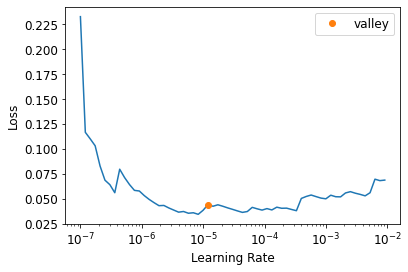

In [23]:
learn.unfreeze()
learn.lr_find()

In [24]:
learn_lm = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [25]:
learn_lm.fine_tune(6, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,1.677453,0.967277,0.309500,0.690500,2.630772,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.671321,0.100558,0.024000,0.976000,1.105788,01:00
1,0.231479,0.026920,0.007500,0.992500,1.027285,01:00
2,0.106520,0.028773,0.007000,0.993000,1.029191,01:00
3,0.069384,0.012127,0.002500,0.997500,1.012201,01:01
4,0.055136,0.008859,0.003000,0.997000,1.008898,01:00
5,0.064599,0.008376,0.002500,0.997500,1.008411,01:00


##Validation

In [26]:
df_test = df_test[0:3000]

In [27]:
def get_index_nan(dataframe) -> list:
  '''
  Encontrar os indices correspondentes as instancias nulas
  '''
  idx = dataframe.loc[pd.isnull(dataframe).any(1), :].index.values
  
  return idx

In [28]:
# pre processing 

#remove nan instances
df_test_clear = df_test[['text', 'label']].dropna()

#remove or convert float numbers - 
df_test_clear = df_test_clear.astype('str')

In [29]:
# create dataloader of test
dblock_test = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test.dataloaders(df_test_clear, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [30]:
df_test_clear.shape

(2892, 2)

In [31]:
test_dl = dloader_test.test_dl(df_test_clear['text'])

In [32]:
preds = learn_lm.get_preds(dl=test_dl, with_decoded=True)

In [33]:
len(preds)

3

In [34]:
learn_lm.validate()

(#4) [0.008375944569706917,0.0024999999441206455,0.9975000023841858,1.008411169052124]

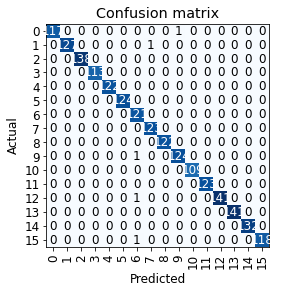

In [35]:
interp = ClassificationInterpretation.from_learner(learn_lm)
interp.plot_confusion_matrix()